In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import nibabel as nib
import scipy.io
import time
import pandas as pd
import glob
import re
import os
import scipy.ndimage
import scipy.linalg
from pathlib import Path

from joblib import Parallel, delayed
from tqdm import tqdm
from itertools import product

In [2]:
### Pick Volume
Vol = 6

water = np.load(f'../data/Vol{Vol}/OriginalData/IsolatedWater.npy')
data = np.load(f'../data/Vol{Vol}/OriginalData/data.npy')
brainmask = np.load(f'../data/Vol{Vol}/masks/brain_mask.npy')


In [4]:
# Fourier transform

water_fft = np.fft.fftshift(np.fft.fft(water, axis=-1), axes=-1)
data_fft = np.fft.fftshift(np.fft.fft(data, axis=-1), axes=-1)

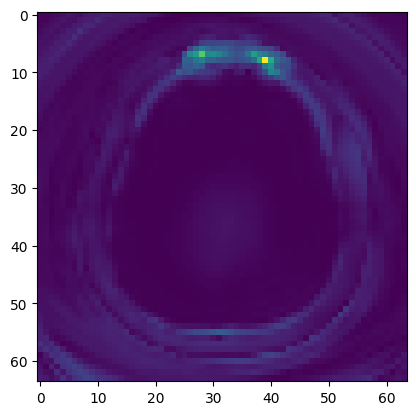

In [8]:
z, t = 15, 2

Slice = np.abs(data)[:,:,z,t]

plt.imshow(Slice)

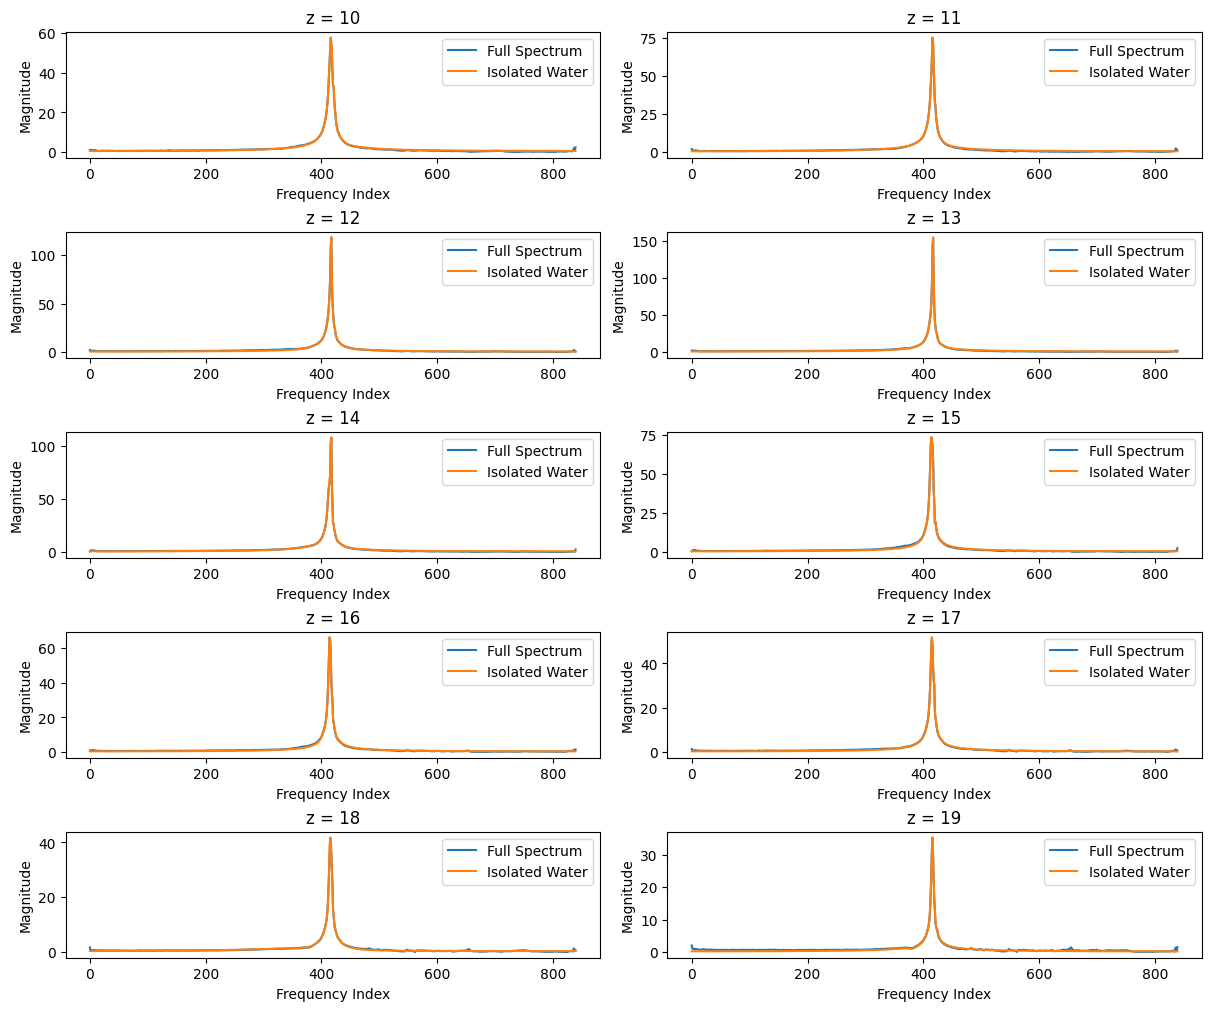

In [16]:
x, y = 30, 30
z_values = range(10, 20)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10), constrained_layout=True)

for idx, z in enumerate(z_values):
    ax = axes[idx // 2, idx % 2]
    Line_water = np.abs(water_fft)[x, y, z, :]
    Line_data = np.abs(data_fft)[x, y, z, :]

    ax.plot(Line_data*brainmask[x,y,z], label='Full Spectrum')
    ax.plot(Line_water*brainmask[x,y,z], label='Isolated Water')
    ax.set_title(f'z = {z}')
    ax.set_xlabel('Frequency Index')
    ax.set_ylabel('Magnitude')
    ax.legend()

plt.show()

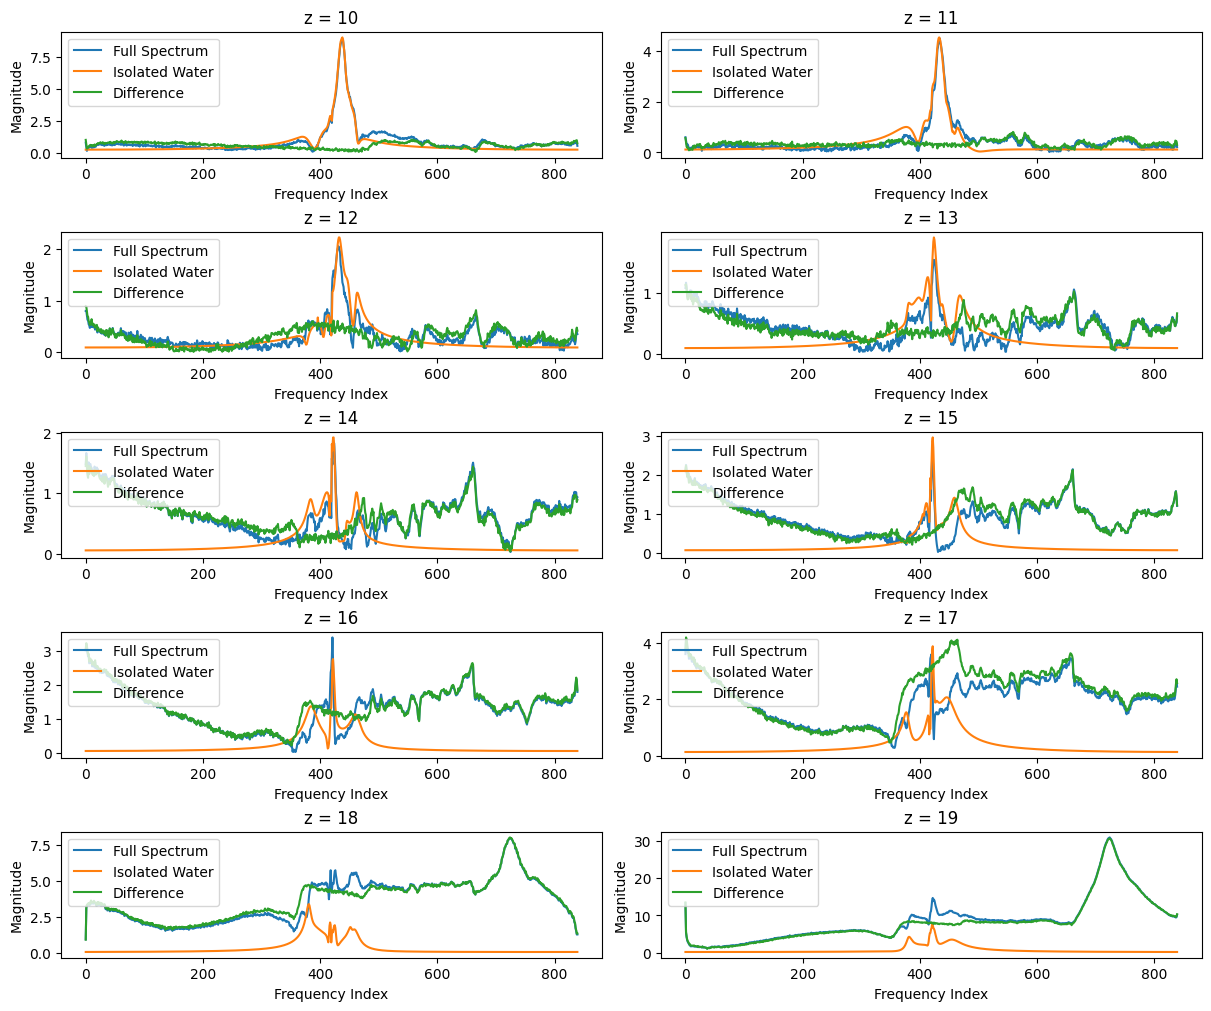

In [12]:
x, y = 20, 20
z_values = range(10, 20)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10), constrained_layout=True)

for idx, z in enumerate(z_values):
    ax = axes[idx // 2, idx % 2]
    Line_water = np.abs(water_fft)[x, y, z, :]
    Line_data = np.abs(data_fft)[x, y, z, :]
    Difference = np.abs(data_fft-water_fft)[x, y, z, :]

    ax.plot(Line_data*brainmask[x,y,z], label='Full Spectrum')
    ax.plot(Line_water*brainmask[x,y,z], label='Isolated Water')
    ax.plot(Difference*brainmask[x,y,z], label='Difference')
    ax.set_title(f'z = {z}')
    ax.set_xlabel('Frequency Index')
    ax.set_ylabel('Magnitude')
    ax.legend(loc="upper left")

plt.show()

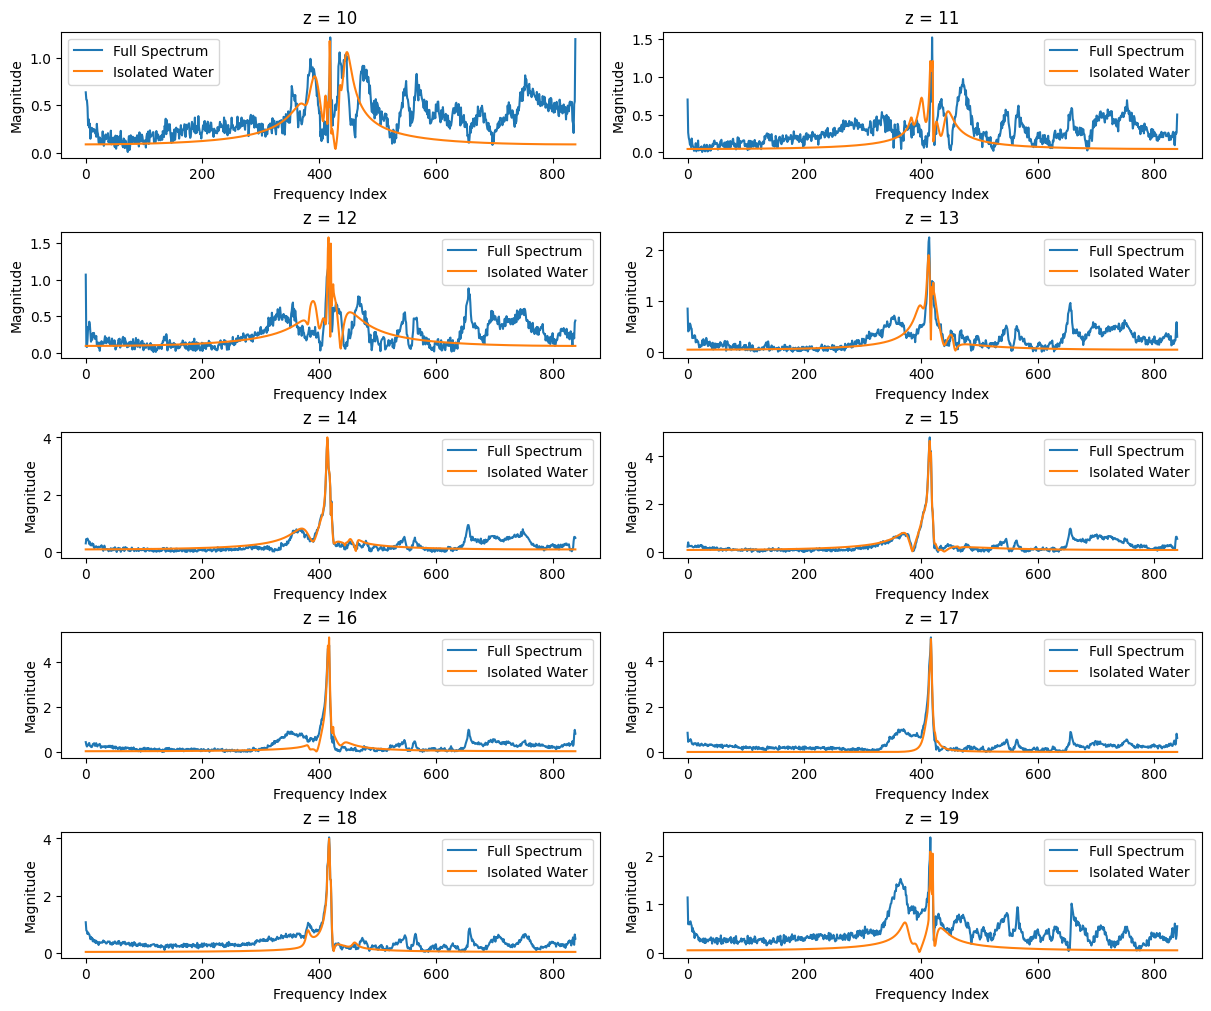

In [18]:
x, y = 25, 25
z_values = range(10, 20)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10), constrained_layout=True)

for idx, z in enumerate(z_values):
    ax = axes[idx // 2, idx % 2]
    Line_water = np.abs(water_fft)[x, y, z, :]
    Line_data = np.abs(data_fft)[x, y, z, :]

    ax.plot(Line_data*brainmask[x,y,z], label='Full Spectrum')
    ax.plot(Line_water*brainmask[x,y,z], label='Isolated Water')
    ax.set_title(f'z = {z}')
    ax.set_xlabel('Frequency Index')
    ax.set_ylabel('Magnitude')
    ax.legend()

plt.show()

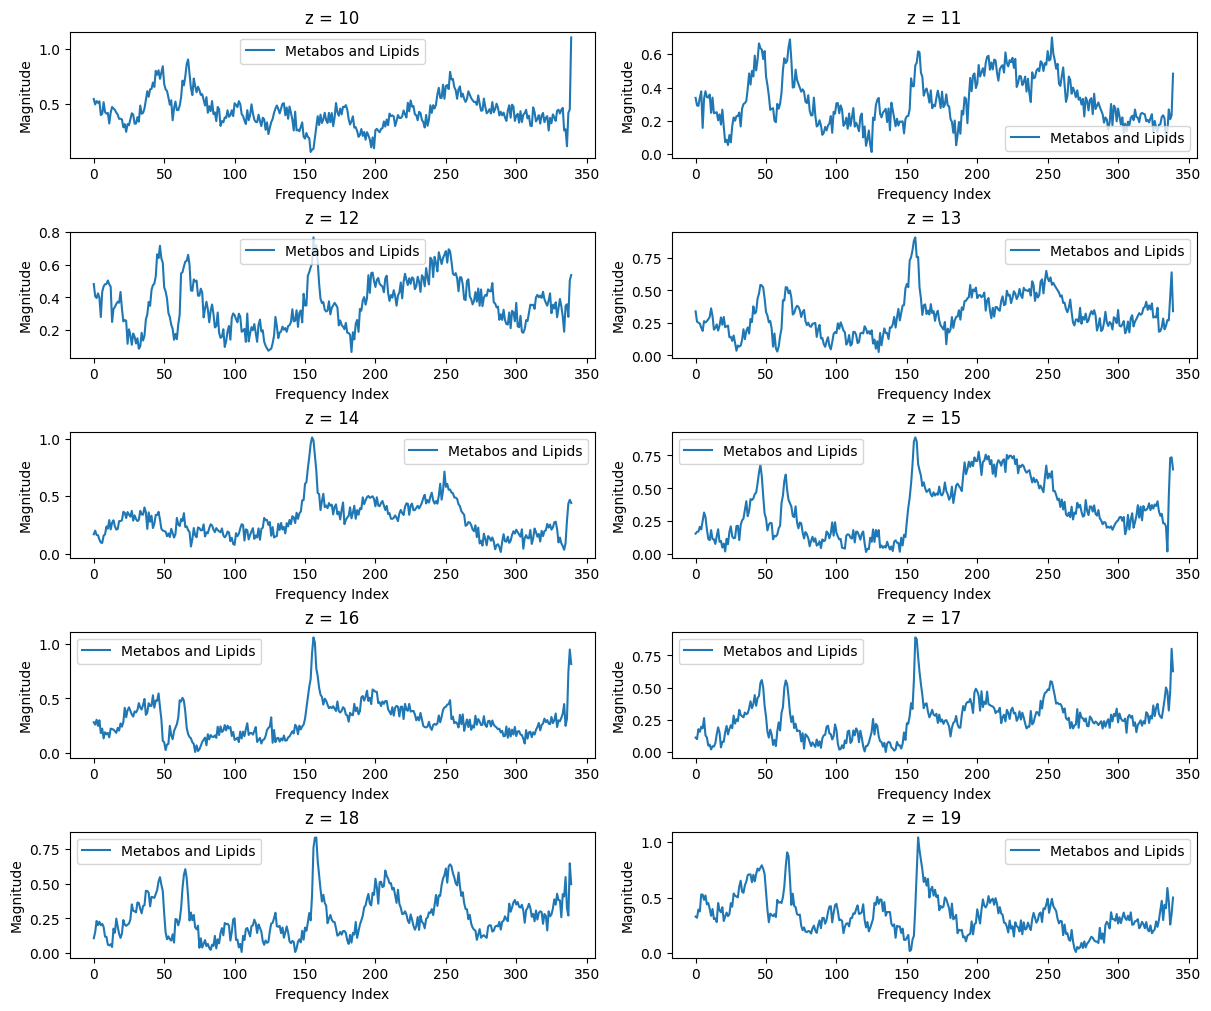

In [14]:
### Lipid + metabolites
start = 500

x, y = 25, 25
z_values = range(10, 20)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 10), constrained_layout=True)

for idx, z in enumerate(z_values):
    ax = axes[idx // 2, idx % 2]
    Line_ML = np.abs(data_fft-water_fft)[x, y, z, start:]

    ax.plot(Line_ML*brainmask[x,y,z], label='Metabos and Lipids')
    ax.set_title(f'z = {z}')
    ax.set_xlabel('Frequency Index')
    ax.set_ylabel('Magnitude')
    ax.legend()

plt.show()